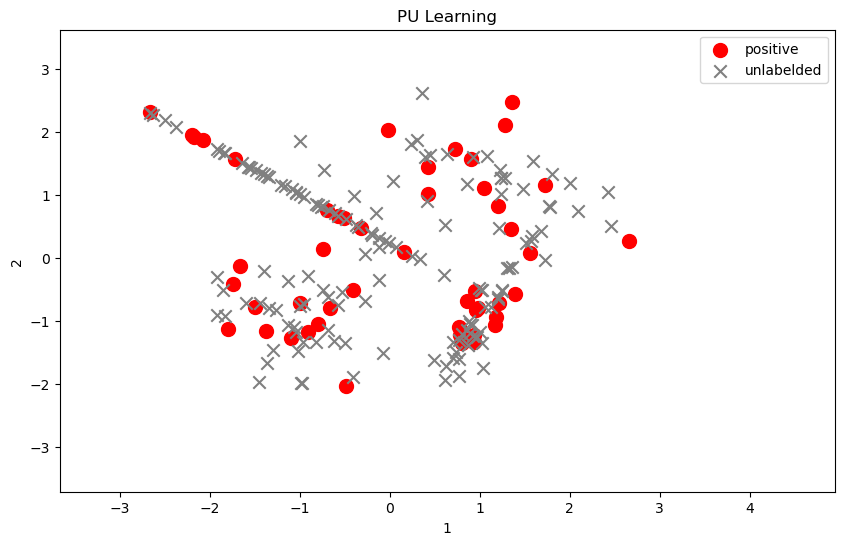

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成一些模拟数据
n_samples = 300
n_features = 2
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# 选择一部分作为正例
n_positive = 50  # 假设前50个是正例
y[:n_positive] = 1  # 正例标签设为1

# 随机选择未标记数据，假设其标签为0（负例）
n_unlabeled = 150
y[n_positive:n_positive+n_unlabeled] = -1  # 未标记的数据暂时当作负例处理

# 划分数据集（模拟的正负样本）
X_positive = X[:n_positive]
y_positive = y[:n_positive]

X_unlabeled = X[n_positive:n_positive + n_unlabeled]
y_unlabeled = y[n_positive:n_positive + n_unlabeled]

# 使用支持向量机（SVM）训练分类器，将未标记数据视为负例
# 训练时将所有未标记数据当作负例
X_train = np.vstack([X_positive, X_unlabeled])
y_train = np.hstack([np.ones(n_positive), np.zeros(n_unlabeled)])  # 将未标记数据当作负例（标签0）

# 训练一个SVM分类器
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# 绘制图形
plt.figure(figsize=(10, 6))

# 绘制正例
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='red', label='positive', marker='o', s=100)

# 绘制未标记的数据
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], color='gray', label='unlabeled', marker='x', s=80)

# 创建网格以便绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 获取分类器对网格点的预测结果
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# 添加标签和标题
plt.title("PU Learning")
plt.xlabel('1')
plt.ylabel('2')

# 显示图例
plt.legend()

# 显示图形
plt.show()
